In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\List of Countries by Sugarcane Production (1).csv")

In [5]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# Data Cleaning

In [5]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

C:\Users\HP\AppData\Local\Temp\ipykernel_31676\1067177181.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
C:\Users\HP\AppData\Local\Temp\ipykernel_31676\1067177181.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
C:\Users\HP\AppData\Local\Temp\ipykernel_31676\1067177181.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Acreage (Hect

In [9]:
df = df.drop( "Unnamed: 0", axis = 1)
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [10]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


## Handling missing values

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [11]:
df.dropna()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


## Handling duplicates

In [10]:
df.duplicated().sum()

0

## Data Type Conversion

In [12]:
df['Production(Tons)']=df['Production(Tons)'].astype('float')
df['Production_per_person(Kg)']=df['Production_per_person(Kg)'].astype('float')
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype('float')
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype('float')

In [13]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# Univariate Analysis

In [14]:
df.columns

Index(['Country', 'Continent', 'Production(Tons)', 'Production_per_person(Kg)',
       'Acreage(Hectare)', 'Yield(Kg/Hectare)'],
      dtype='object')

# How many countries produce sugarcane from each continent

In [15]:
df['Continent'].value_counts()

Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: Continent, dtype: int64

<AxesSubplot:>

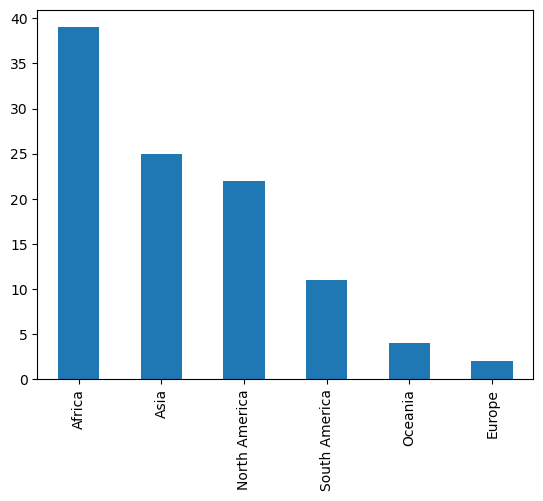

In [18]:
df['Continent'].value_counts().plot(kind='bar')

<p>Africa has maximum countires which produce sugarcane</p>

# Checking outliers

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

<AxesSubplot:xlabel='Yield(Kg/Hectare)'>

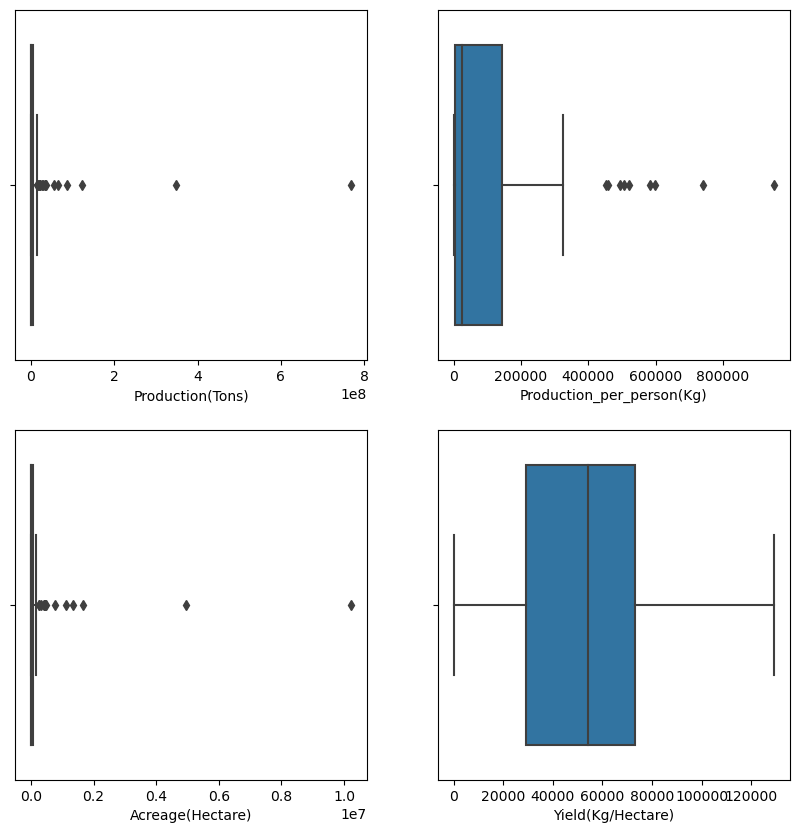

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])

# Distibution of columns

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

Text(0.5, 1.0, 'Yield(Kg/Hectare)')

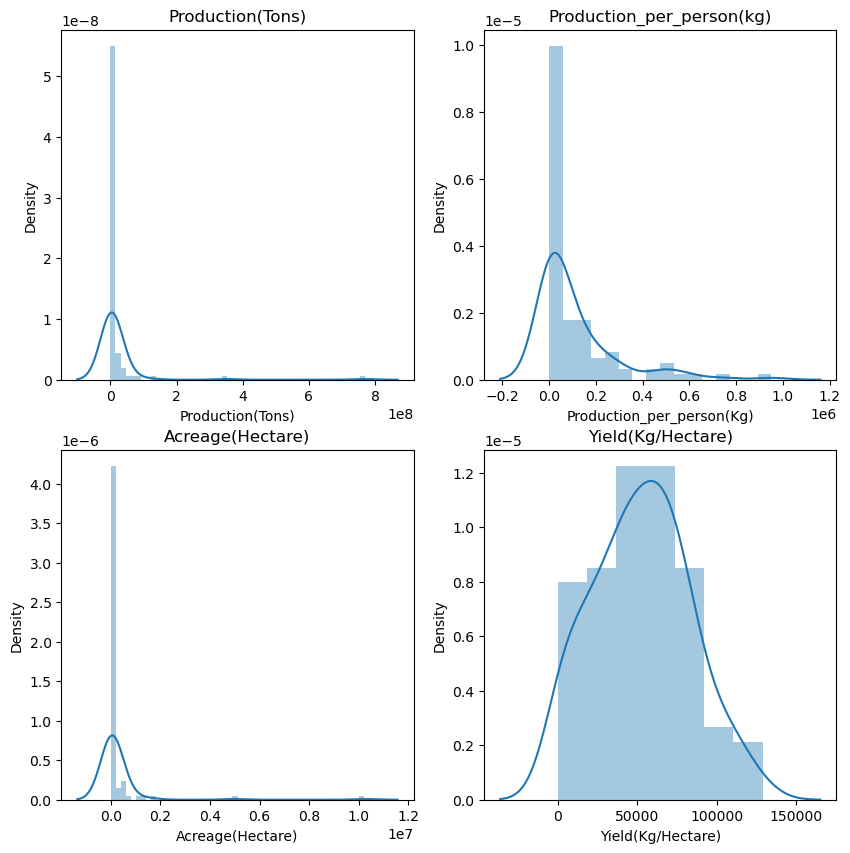

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.distplot(df['Production_per_person(Kg)'])
plt.title('Production_per_person(kg)')
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)')
plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yield(Kg/Hectare)'>

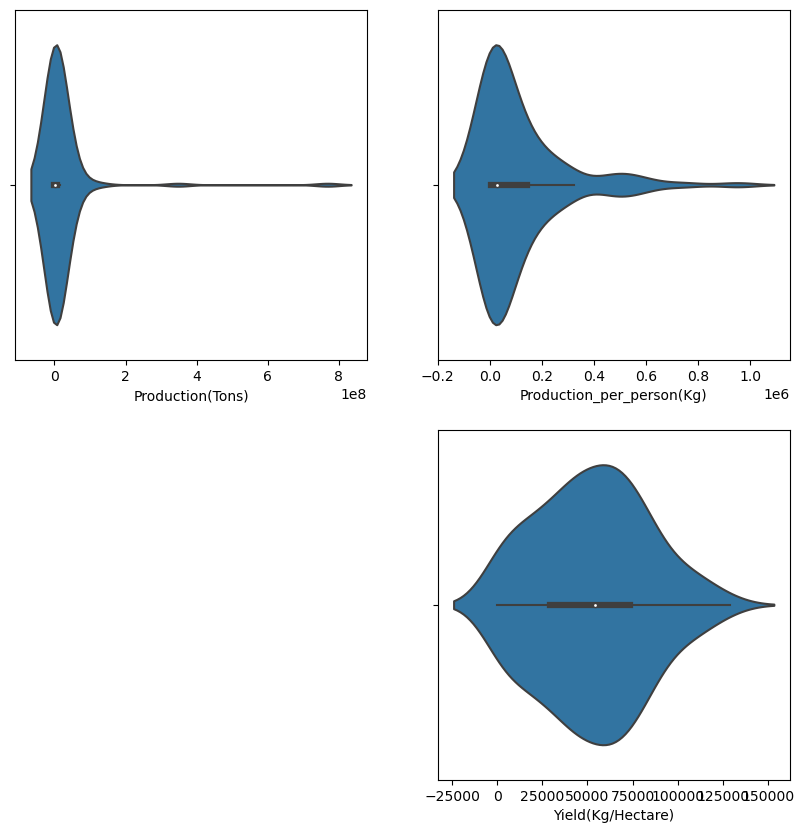

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(df['Production(Tons)'])
plt.subplot(2,2,2)
sns.violinplot(df['Production_per_person(Kg)'])
plt.subplot(2,2,4)
sns.violinplot(df['Yield(Kg/Hectare)'])

# Bivariate Analysis

In [28]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane

In [30]:
df_new=df[['Country','Production(Tons)']].set_index('Country')

In [31]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [34]:
df_new['Production(Tons)_percent']=df_new['Production(Tons)']*100/df_new['Production(Tons)'].sum()

In [35]:
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,4.072728e+01,4.072728e+01
India,1.846200e+01,1.846200e+01
China,6.520138e+00,6.520138e+00
Thailand,4.634389e+00,4.634389e+00
Pakistan,3.467809e+00,3.467809e+00
...,...,...
Lebanon,5.139401e-06,5.139401e-06
Djibouti,2.808126e-06,2.808126e-06
Singapore,2.649176e-06,2.649176e-06


<AxesSubplot:ylabel='Production(Tons)_percent'>

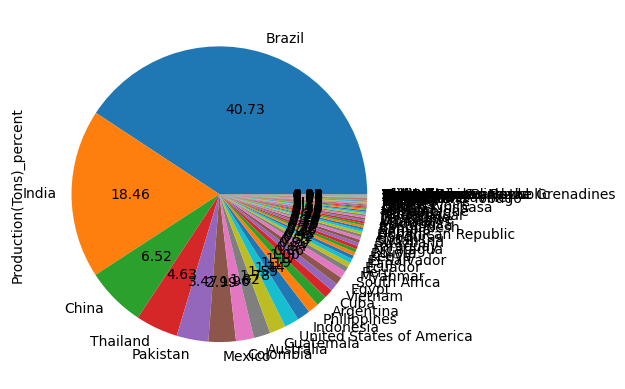

In [37]:
df_new['Production(Tons)_percent'].plot(kind='pie',autopct='%.2f')

<p> Brazil,India and china have 65% percent production </p>

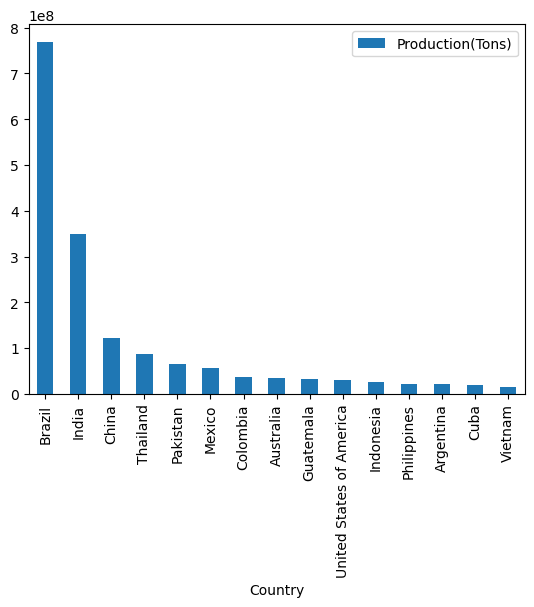

In [38]:
df_new=df[['Country','Production(Tons)']].set_index('Country').sort_values('Production(Tons)',ascending=False).head(15).plot(kind='bar')

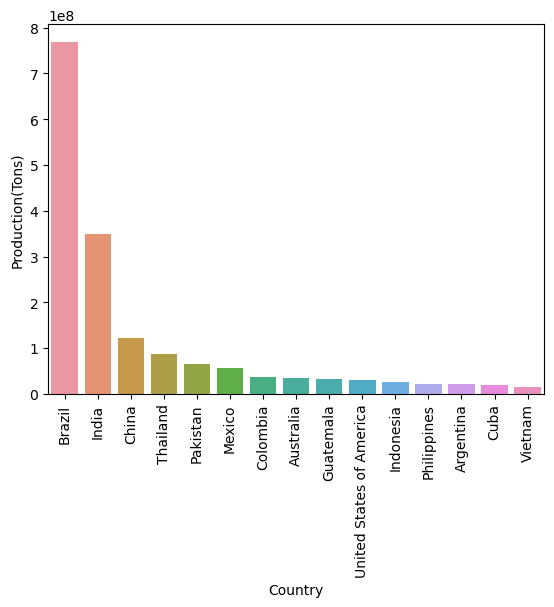

In [39]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

<p>Brazil produces maximum suagarcane</p>

### Which country has highest land

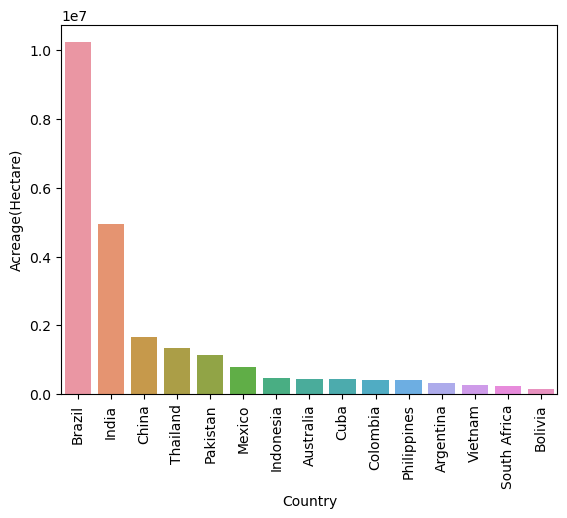

In [40]:
df_acr=df.sort_values('Acreage(Hectare)',ascending=False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Which country has highest yield per Hectare?

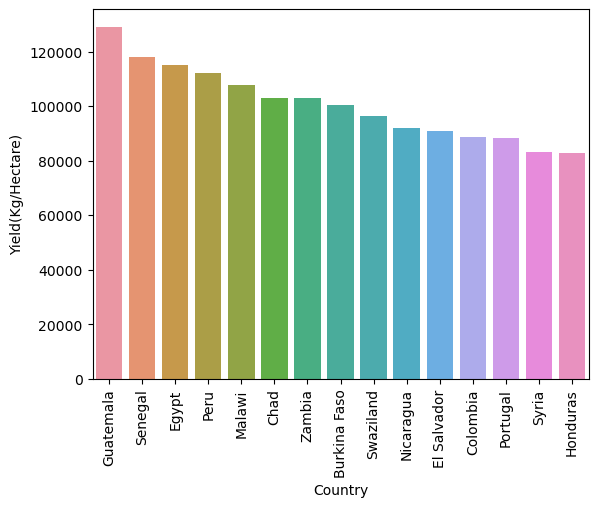

In [41]:
df_acr=df.sort_values('Yield(Kg/Hectare)',ascending=False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

<p> Guatemala has highest yield par hectare </p>

### Which country has highest production?

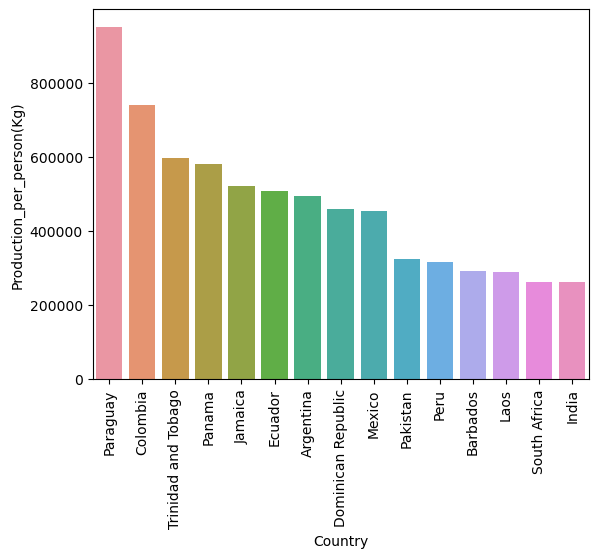

In [43]:
df_acr=df.sort_values('Production_per_person(Kg)',ascending=False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Production_per_person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

<p>Production per person is highest in Paraguay</p>

# Correlation

In [45]:
df.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.016341,0.997550,0.132812
Production_per_person(Kg),0.016341,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<AxesSubplot:>

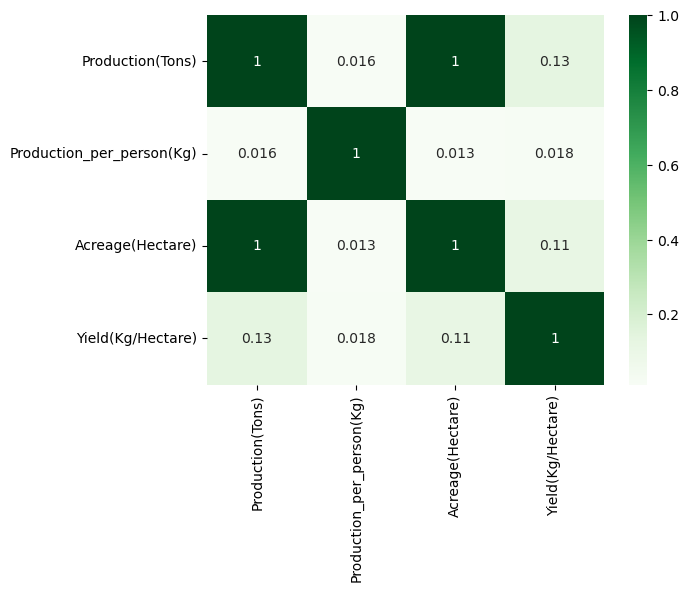

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='Greens')

### Do countries with highest land produce more suagrcane?

<AxesSubplot:xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

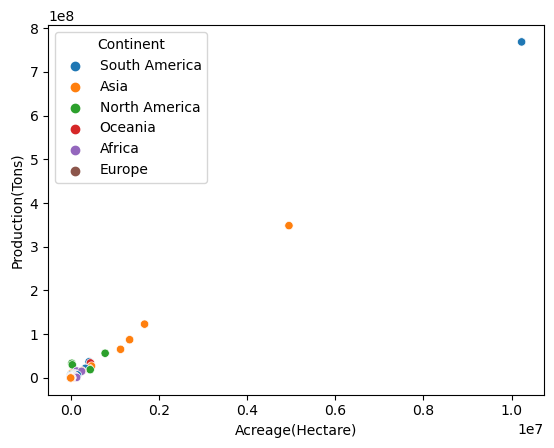

In [48]:
sns.scatterplot(x='Acreage(Hectare)',y='Production(Tons)',hue='Continent',data=df)

<p> Overall increase in land increases production</p>

### Do countries which yield more sugarcane production per hectare produces more sugarcane in total?

<AxesSubplot:xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

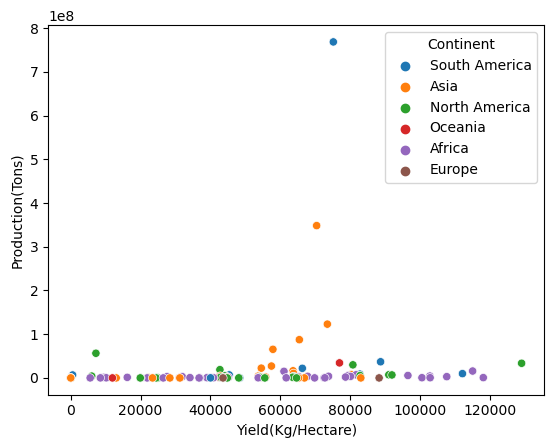

In [49]:
sns.scatterplot(x='Yield(Kg/Hectare)',y='Production(Tons)',hue='Continent',data=df)

In [50]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Analysis of continent

In [52]:
df_continent=df.groupby('Continent').sum()

In [56]:
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]

In [57]:
df_continent

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,
Africa,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?

<AxesSubplot:xlabel='Continent'>

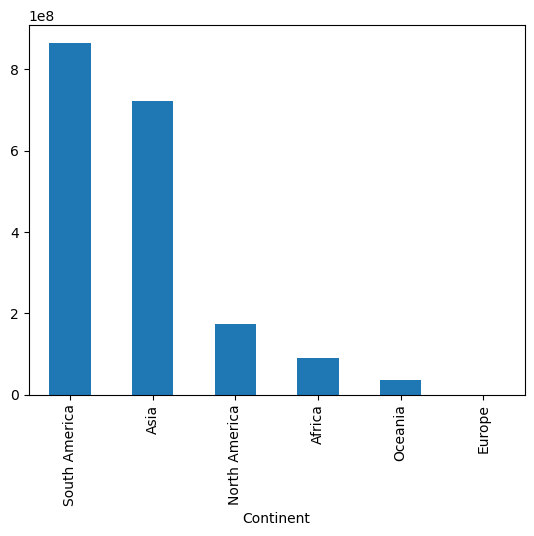

In [58]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

### Do number of countries in a continent effects production of sugarcane? 

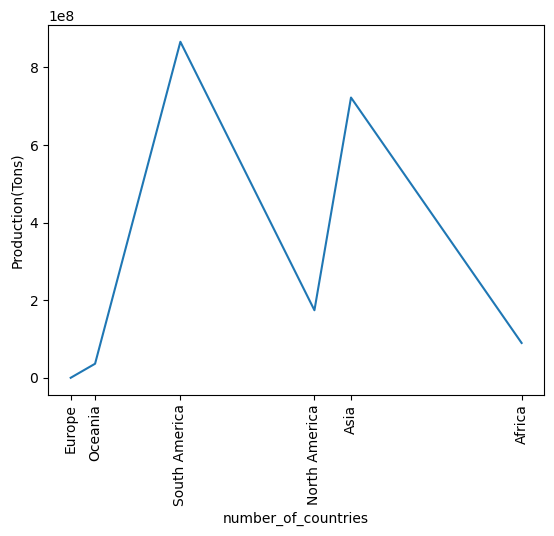

In [59]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### Do continent with highest land produces more sugarcane?

<AxesSubplot:xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

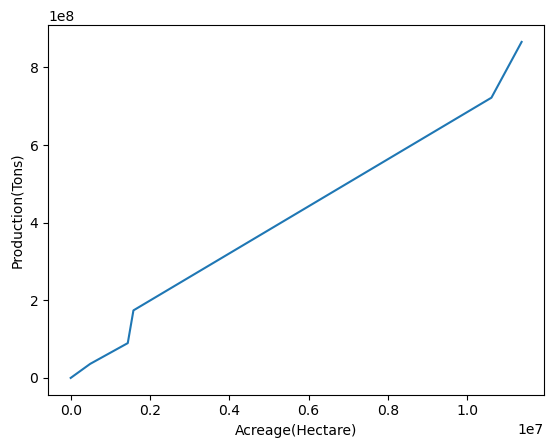

In [60]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

### Production distribution by continent

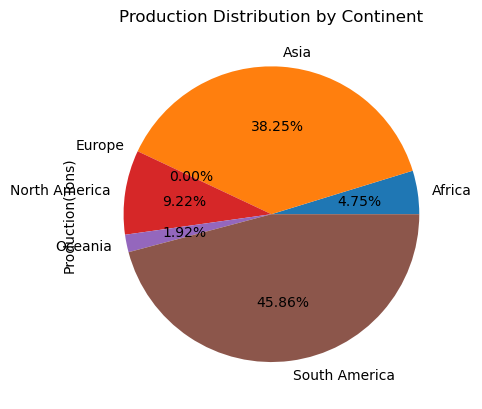

In [61]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%")
plt.title('Production Distribution by Continent')
plt.show()

### Correlation of Continent

In [62]:
df_continent.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522207,0.994897,0.091201,0.098495
Production_per_person(Kg),0.522207,1.000000,0.463211,0.542971,0.531984
Acreage(Hectare),0.994897,0.463211,1.000000,0.111166,0.122407
Yield(Kg/Hectare),0.091201,0.542971,0.111166,1.000000,0.991746
number_of_countries,0.098495,0.531984,0.122407,0.991746,1.000000
